Model Evaluation - Logistic Regression:
Accuracy: 0.93
Precision: 0.97
Recall: 0.94
F1 Score: 0.95


Model Evaluation - Random Forest:
Accuracy: 0.91
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


Model Evaluation - Gradient Boosting:
Accuracy: 0.91
Precision: 0.94
Recall: 0.94
F1 Score: 0.94




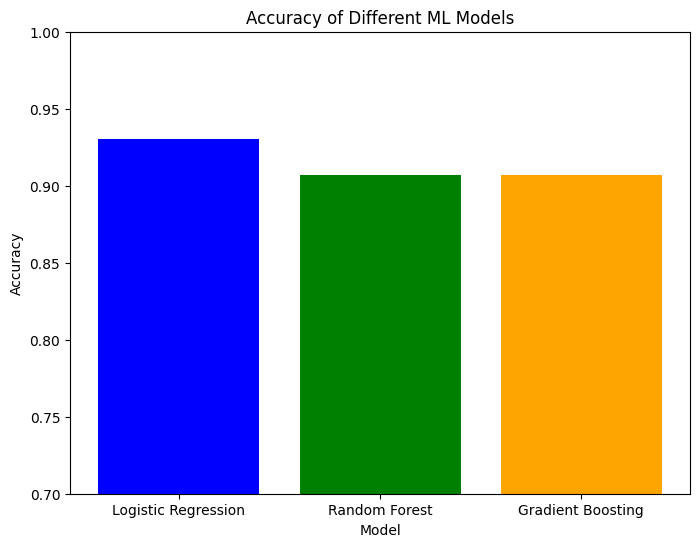

Predictions saved to 'student_placement_predictions.csv'.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")

# Drop irrelevant columns
X = df.drop(['sl_no', 'status', 'salary'], axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# One-hot encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that both train and test sets have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Save the original columns for later use
feature_columns = X_train.columns

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Model names and list
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
models = [logistic_regression, random_forest, gradient_boosting]
accuracies = []
predictions = {}

# Train and evaluate each model, also store predictions
for model_name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store predictions
    predictions[model_name] = y_pred
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    precision = precision_score(y_test, y_pred, pos_label='Placed')
    recall = recall_score(y_test, y_pred, pos_label='Placed')
    f1 = f1_score(y_test, y_pred, pos_label='Placed')

    print(f"Model Evaluation - {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

# Plot accuracy of models
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')
plt.ylim(0.7, 1.0)
plt.show()

# Convert X_test back to DataFrame using the saved column names
output_df = pd.DataFrame(X_test, columns=feature_columns)

# Add the actual status to the DataFrame
output_df['Actual Status'] = y_test.values

# Add predictions from each model
for model_name in model_names:
    output_df[f'{model_name} Prediction'] = predictions[model_name]

# Save the results to a CSV file
output_df.to_csv("student_placement_predictions.csv", index=False)

print("Predictions saved to 'student_placement_predictions.csv'.")
